In [164]:
#pip install qikit

In [165]:
# general
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math

# qiskit library
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit import execute
from qiskit import transpile

# qiskit visualization
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector

In [166]:

## 量子回路とsubplotのaxを与えることで，ヒストグラムを描画する関数
def plot_hist_states(qc, ax):
    simulator = Aer.get_backend('aer_simulator')
    circ = transpile(qc, simulator)
    result = simulator.run(qc).result()

    counts = result.get_counts()

    return plot_histogram(counts, ax=ax)

# Q1.
 

In [167]:
qc = QuantumCircuit(QuantumRegister(4, "q"), ClassicalRegister(4, "c"))
qc.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
c: 4/

# Q2.

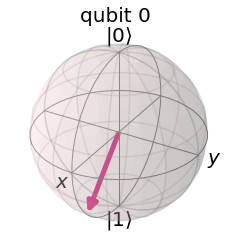

In [168]:
qc = QuantumCircuit(1,1) # 1 qubit, 1 classical bit
qc.ry(3*np.pi/4, 0)# rotate qubit 0 by pi/4 around y-axis
#qc.measure(0,0) # measure qubit 0 to classical bit 0
#qc.draw() # draw circuit


simulator = Aer.get_backend('statevector_simulator') # statevector simulator
job = execute(qc, simulator) # run simulation
result = job.result() # get results
statevector = result.get_statevector(qc) # get state vector
plot_bloch_multivector(statevector) # plot state vector

Text(-0.3, 700, "probabity to get '0' state is 0.1387")

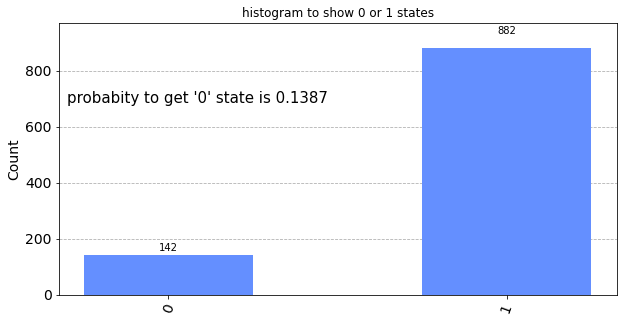

In [169]:
qc = QuantumCircuit(1,1) # 1 qubit, 1 classical bit
qc.ry(3*np.pi/4, 0)# rotate qubit 0 by pi/4 around y-axis
qc.measure(0,0) # measure qubit 0 to classical bit 0
#qc.draw() # draw circuit

fig, axes = plt.subplots(1, 1, figsize=(10,5))
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)
result = simulator.run(qc).result()
counts = result.get_counts()
plot_histogram(counts, ax=axes)
probability_0 = counts['0']/sum(counts.values())

axes.set_title("histogram to show 0 or 1 states")
axes.text(-0.3,700,"probabity to get '0' state is {}".format(round(probability_0,4)), fontsize=15, va='center')





# Q5 

/var/folders/qr/pfg_51z97zj8jht4_vg_2k800000gn/T/ipykernel_7589/1724875969.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


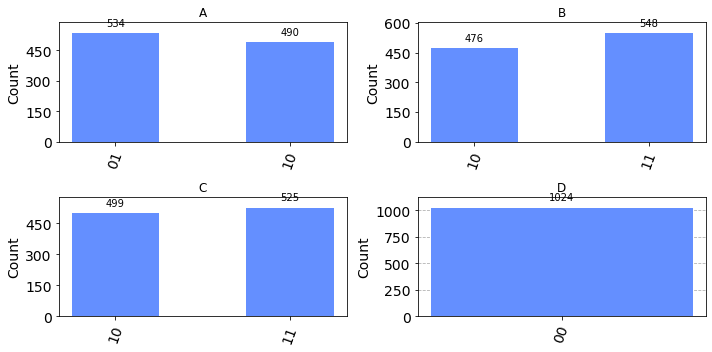

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axax=axes.ravel()

## 各選択肢ごとの量子回路を作成，その状態のヒストグラムを描画する
#[A]
bell = QuantumCircuit(2,2) # 1 qubit, 1 classical bit
bell.h(0)
bell.x(1)
bell.cx(0,1)
bell.measure([0,1],[0,1])
plot_hist_states(bell, axax[0])
axax[0].set_title("A")

#selection = ["A", "B", "C", "D"]

#[B]
bell = QuantumCircuit(2, 2)
bell.cx(0,1)
bell.h(0)
bell.x(1)
bell.measure([0,1], [0,1])
plot_hist_states(bell, axax[1])
axax[1].set_title("B")

#[C]
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.x(1)
bell.cz(0,1)
bell.measure([0,1], [0,1])
plot_hist_states(bell, axax[2])
axax[2].set_title("C")


#[D]
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.h(0)
bell.measure([0,1], [0,1])
plot_hist_states(bell, axax[3])
axax[3].set_title("D")

fig.tight_layout()
fig.show()




# Q6.

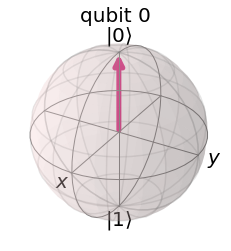

In [171]:
#初期状態をブロッホ球で描いてみる
qc = QuantumCircuit(1)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector(qc)
plot_bloch_multivector(statevector)

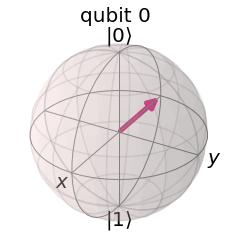

In [172]:
#選択肢[D]
qc = QuantumCircuit(1)
qc.rx(math.pi/2,0)
qc.rz(-math.pi/2,0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector(qc)
plot_bloch_multivector(statevector)

# Q8.

In [173]:
qc = QuantumCircuit(3, 3)

qc.initialize([1/math.sqrt(2), 0, 0, 1/math.sqrt(2),0,0,0,0], [0,1,2])
qc.measure([0,1,2],[0,1,2])










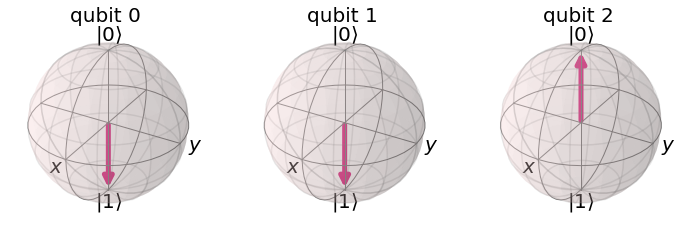

In [174]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector(qc)
plot_bloch_multivector(statevector)


In [175]:
qc = QuantumCircuit(3)
qc.initialize(8)
qc.draw()
#qc.measure([0],[0])

┌────────────────┐
q_0: ┤0               ├
     │                │
q_1: ┤1 Initialize(8) ├
     │                │
q_2: ┤2               ├
     └────────────────┘

/var/folders/qr/pfg_51z97zj8jht4_vg_2k800000gn/T/ipykernel_7589/338828288.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


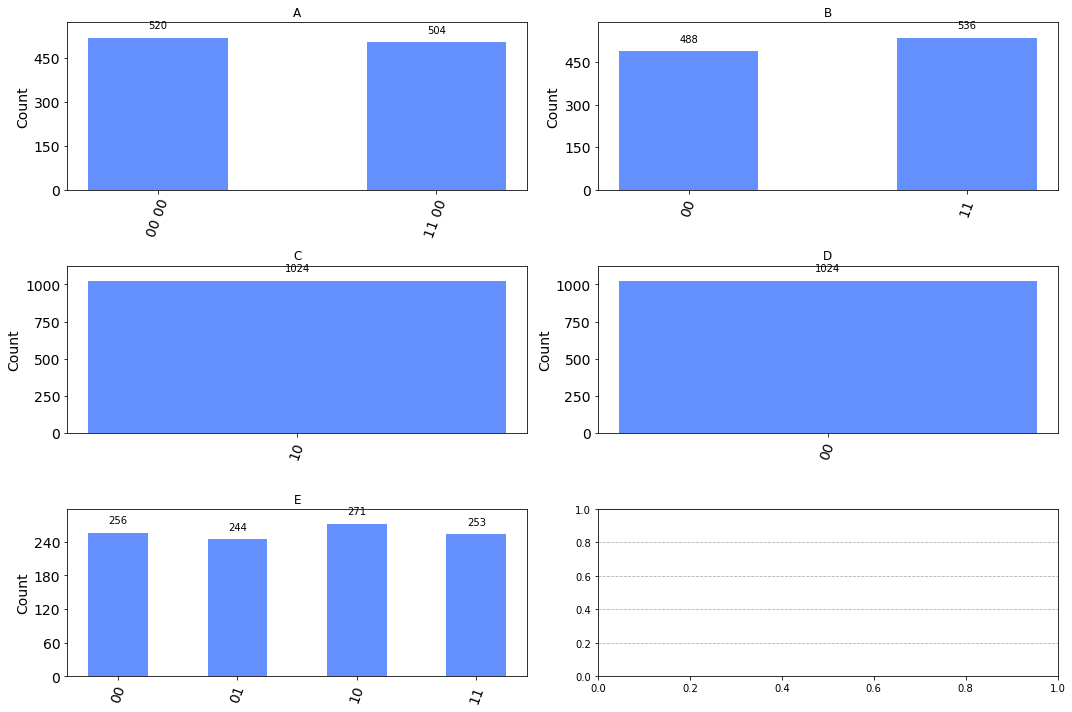

In [176]:
fig, axes = plt.subplots(3,2, figsize=(15,10))
axax = axes.ravel()

# selection [A]
qc = QuantumCircuit(2,2)
v = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]
qc.initialize(v,[0,1])
#qc.measure([0,1], [0,1])
qc.measure_all()
plot_hist_states(qc, axax[0])
axax[0].set_title("A")

# selection [B]
qc = QuantumCircuit(2)
qc.h(0)  
qc.cx(0,1)
qc.measure_all()
plot_hist_states(qc, axax[1])
axax[1].set_title("B")

# selection [C]
v1 = [1,0]
v2 = [0,1]

qc = QuantumCircuit(2)
qc.initialize(v1, 0)
qc.initialize(v2, 1)
qc.measure_all()
plot_hist_states(qc, axax[2])
axax[2].set_title("C")

# selection [D]
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.measure_all()
plot_hist_states(qc, axax[3])
axax[3].set_title("D")

# selection [E]
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.measure_all()
plot_hist_states(qc, axax[4])
axax[4].set_title("E")

fig.tight_layout()
fig.show()